In [ ]:
#EEMidsem Project
#7 different waves are considered
#0th wave - noise
#1st wave - triangular wave of frequency 1
#2nd wave - triangular wave of frequency 2
#3rd wave - triangular wave of frequency 3
#4th wave - sine wave with frequency 1
#5th wave - sine wave with frequency 2
#6th wave - sine wave with frequency 3

#These waves are passed through noise of a random window
#We are designing neural network model to estimate the waves

In [31]:
import tensorflow as tf
from tensorflow import keras
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [32]:
cwd=os.getcwd()
JSON_FILE_PATH ='%s/%s' %(cwd,'/Downloads/ee695_midsem_dataset.json')

#Dictionary to hold json file data
data={}

#open ee695_midsem_dataset.json,parse values and store them in dictionary
with open(JSON_FILE_PATH,'r') as data_file:
    data=json.loads(data_file.read())


print(data.keys())

dict_keys(['inputs', 'targets'])


In [33]:
len(data['inputs'])

10000

In [34]:
len(data['targets'])

10000

In [35]:
len(data['inputs'][0])

2020

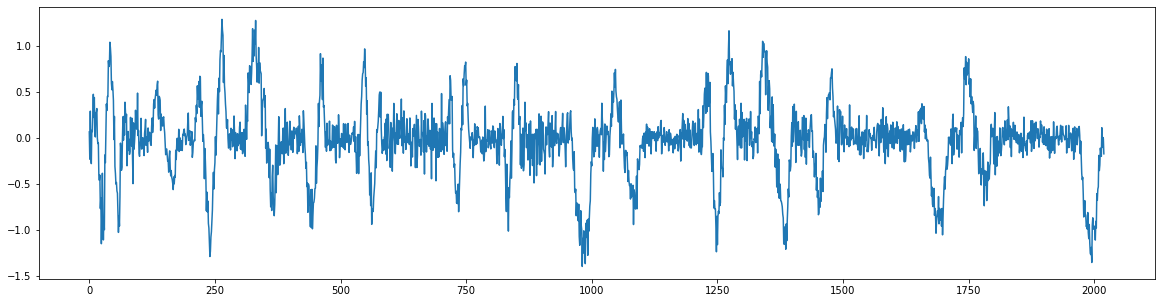

[3, 1, 2, 4, 5, 6, 0, 6, 3, 4, 1, 0, 5, 1, 2, 0, 4, 1, 0, 4]


In [36]:
plt.figure(figsize=(20,5))
plt.plot(data['inputs'][0])
plt.show()

print(data['targets'][0])

In [37]:
data['inputs'][0]

[0.06691735547851195,
 -0.22896195574937278,
 0.2919471962775946,
 -0.18251249585387358,
 -0.27748933624459565,
 0.08326305172844387,
 0.06983604420340164,
 0.2756047502540971,
 0.4748400524932622,
 0.2236240348117047,
 0.44024160096021014,
 0.03929072860367733,
 0.012128303262083084,
 0.2726164700955449,
 0.2824184469807599,
 0.320231986648126,
 0.0010659069014781614,
 -0.05931705867519002,
 -0.05406562230240981,
 -0.4054007400467182,
 -0.4581429897228909,
 -0.4019939027034468,
 -0.7644149689683097,
 -0.6509310363125392,
 -1.146646400990533,
 -0.8165242598089645,
 -0.3820678846289029,
 -0.8050401135214817,
 -1.1052663549296005,
 -0.8852930909523719,
 -0.9941010899409328,
 -0.18327065821119853,
 -0.26660363412794696,
 0.038493805536019374,
 0.3694094627746848,
 0.29884755161336674,
 0.45150998804571907,
 0.44885576826079515,
 0.8392243829966484,
 0.7753999212337276,
 0.7927507901916273,
 1.039517849495673,
 0.9789948382015096,
 0.8864521841870912,
 0.5957834293762498,
 0.52394852708979

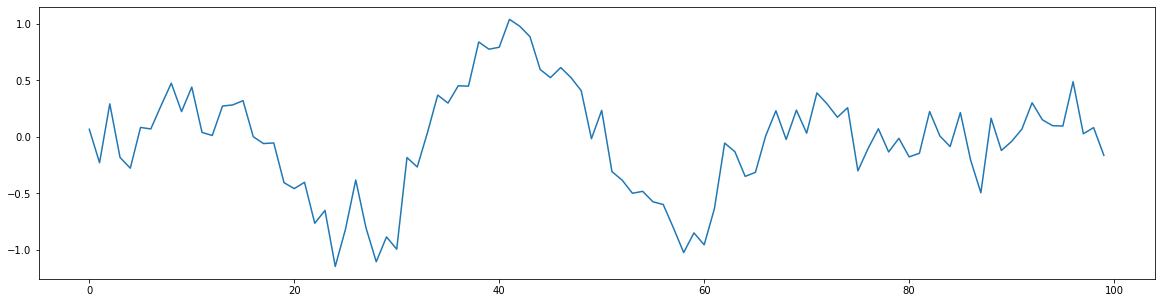

3


In [38]:
#Plot of single wave
plt.figure(figsize=(20,5))
plt.plot(data['inputs'][0][0:100])
plt.show()

print(data['targets'][0][0])

In [39]:
#Converting the data in dictionary to numpy array
inputs=np.array(list(data['inputs']))

In [40]:
np.size(inputs)

20200000

In [41]:
inputs.shape

(10000, 2020)

In [42]:
targets=np.array(list(data['targets']))

In [43]:
targets.shape

(10000, 20)

In [44]:
#Neural network model
#Total data contains 10,000 waveforms each consisting of 20 set of waveforms
#Each element of inputs array contains set of 20 waves of length 100 each

#Considering each set of waves of length 2000.Ommitting last 20 values in each set 
input_new=np.delete(inputs,slice(2000,2020),1)
input_new.shape

(10000, 2000)

In [46]:
#Splitting the total data into 80% training data and 20% test data
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(input_new,targets,test_size=0.2)
train_input.shape

(8000, 2000)

In [47]:
test_input.shape

(2000, 2000)

In [48]:
train_target.shape

(8000, 20)

In [49]:
test_target.shape

(2000, 20)

In [50]:
#Splitting 8,000 set of train_input waves into 8,000*20 waveforms(Each of length 100)

train_input_new=train_input.reshape(8000*20,100)
train_input_new.shape



(160000, 100)

In [51]:
train_target_new=train_target.reshape(8000*20,1)
train_target_new.shape

(160000, 1)

In [52]:
hidden1=keras.layers.Dense(units=15,input_shape=(100,),activation='relu')
hidden2=keras.layers.Dense(units=15,activation='relu')
output=keras.layers.Dense(units=7,activation='sigmoid')
model=tf.keras.Sequential([hidden1,hidden2,output])


In [53]:
#sgd=tf.keras.optimizers.SGD(learning_rate=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(
    optimizer='adam',
    #optimizer=sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [54]:
model.fit(train_input_new,train_target_new,epochs=100)

Epoch 1/100
5000/5000 [==============================] - 11s 2ms/step - loss: 0.5056 - accuracy: 0.7427
Epoch 2/100
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3804 - accuracy: 0.8081
Epoch 3/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.3474 - accuracy: 0.8320
Epoch 4/100
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3169 - accuracy: 0.8531
Epoch 5/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2956 - accuracy: 0.8677
Epoch 6/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2807 - accuracy: 0.8778
Epoch 7/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2709 - accuracy: 0.8824
Epoch 8/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.2639 - accuracy: 0.8863
Epoch 9/100
5000/5000 [==============================] - 8s 2ms/step - loss: 0.2580 - accuracy: 0.8888
Epoch 10/100
5000/5000 [==============================] - 7s 1ms/step - 

In [55]:
#Splitting test data
test_input_new=test_input.reshape(2000*20,100)
test_input_new.shape

(40000, 100)

In [56]:
test_target_new=test_target.reshape(2000*20,1)
test_target_new.shape

(40000, 1)

In [57]:
model.evaluate(test_input_new,test_target_new)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.2310 - accuracy: 0.9024


[0.23099450767040253, 0.9023749828338623]

In [58]:
y_predicted=model.predict(test_input_new)

In [59]:
y_predicted

array([[0.00000000e+00, 0.00000000e+00, 3.29403482e-20, ...,
        1.20028541e-31, 2.81646989e-15, 1.23479140e-06],
       [1.52308287e-26, 8.81467325e-16, 9.97131705e-01, ...,
        1.02162719e-15, 9.99854028e-01, 6.68913126e-04],
       [3.34007598e-30, 9.99946833e-01, 2.07694688e-13, ...,
        9.99947667e-01, 2.20456617e-12, 8.39710174e-06],
       ...,
       [0.00000000e+00, 4.88186698e-33, 9.98611927e-01, ...,
        2.57279541e-28, 9.99394536e-01, 1.12319198e-04],
       [0.00000000e+00, 8.02798883e-10, 1.13141524e-17, ...,
        2.56129701e-11, 6.33871788e-10, 1.99711919e-01],
       [1.50637242e-26, 6.31006988e-17, 9.93911624e-01, ...,
        7.17973780e-17, 7.80667543e-01, 2.25722790e-04]], dtype=float32)

In [60]:
y_predicted.shape

(40000, 7)

In [61]:
test_target_new.shape

(40000, 1)

In [62]:
model.predict(test_input_new).shape

(40000, 7)

In [63]:
y_predicted[0]

array([0.0000000e+00, 0.0000000e+00, 3.2940348e-20, 4.4716295e-08,
       1.2002854e-31, 2.8164699e-15, 1.2347914e-06], dtype=float32)

In [64]:
test_target_new[0]

array([6])

In [65]:
test_target_new[1]

array([2])

In [66]:
y_predicted[1]

array([1.5230829e-26, 8.8146732e-16, 9.9713171e-01, 6.5031648e-04,
       1.0216272e-15, 9.9985403e-01, 6.6891313e-04], dtype=float32)

In [67]:
test_target_new[2]

array([4])

In [68]:
y_predicted[2]

array([3.3400760e-30, 9.9994683e-01, 2.0769469e-13, 4.8106908e-06,
       9.9994767e-01, 2.2045662e-12, 8.3971017e-06], dtype=float32)

In [69]:
test_target_new.shape

(40000, 1)

In [70]:
targets_predicted=[np.argmax(i) for i in y_predicted]
targets_predicted

[6,
 5,
 4,
 3,
 1,
 2,
 2,
 1,
 2,
 6,
 6,
 2,
 6,
 1,
 2,
 2,
 4,
 2,
 6,
 1,
 0,
 3,
 2,
 4,
 3,
 4,
 0,
 2,
 1,
 6,
 1,
 1,
 1,
 2,
 0,
 5,
 1,
 0,
 2,
 6,
 0,
 1,
 2,
 2,
 5,
 3,
 0,
 5,
 3,
 0,
 0,
 2,
 1,
 1,
 3,
 0,
 6,
 4,
 6,
 5,
 1,
 0,
 3,
 3,
 6,
 0,
 6,
 3,
 0,
 3,
 4,
 2,
 1,
 3,
 1,
 0,
 3,
 0,
 3,
 6,
 4,
 2,
 2,
 2,
 6,
 5,
 6,
 6,
 1,
 6,
 0,
 6,
 6,
 4,
 2,
 3,
 3,
 5,
 0,
 2,
 5,
 4,
 5,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 4,
 3,
 0,
 1,
 4,
 6,
 1,
 1,
 0,
 5,
 6,
 0,
 2,
 4,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 3,
 3,
 4,
 2,
 2,
 6,
 1,
 0,
 1,
 5,
 4,
 1,
 4,
 1,
 1,
 0,
 2,
 6,
 1,
 1,
 4,
 0,
 2,
 0,
 2,
 2,
 1,
 5,
 1,
 0,
 4,
 1,
 1,
 3,
 2,
 6,
 3,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 5,
 6,
 3,
 1,
 1,
 5,
 1,
 2,
 4,
 2,
 0,
 2,
 3,
 2,
 1,
 3,
 6,
 1,
 3,
 6,
 1,
 3,
 1,
 2,
 4,
 1,
 6,
 0,
 0,
 5,
 2,
 3,
 1,
 1,
 3,
 3,
 2,
 0,
 4,
 6,
 4,
 5,
 1,
 1,
 1,
 0,
 6,
 1,
 0,
 4,
 3,
 1,
 0,
 6,
 2,
 2,
 0,
 3,
 2,
 3,
 5,
 5,
 3,
 3,
 1,
 1,
 5,
 2,
 0,
 1,
 2,
 6,
 6,


In [71]:
test_target_new

array([[6],
       [2],
       [4],
       ...,
       [2],
       [6],
       [2]])

In [72]:
#Creating confusion matrix
cm=tf.math.confusion_matrix(labels=test_target_new,predictions=targets_predicted)
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[5645,    0,    2,    0,    0,    0,    0],
       [   0, 5346,    0,    1,  436,    0,    0],
       [   0,    0, 5331,    1,    1,  341,    0],
       [   3,    2,    0, 4851,    1,    1,  850],
       [   0, 2763,    0,    1, 2985,    0,    1],
       [   0,    0, 2971,    0,    1, 2841,    0],
       [   0,    0,    0,  521,    0,    0, 5104]])>

Text(69.0, 0.5, 'Truth')

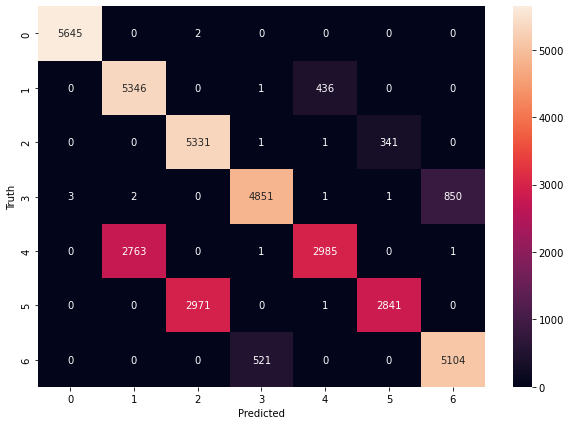

In [75]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
#Combining 20 waves into one set -  Actual data
final_test_input=test_input_new.reshape(2000,100*20)
final_test_input.shape

(2000, 2000)

In [77]:
final_test_target=test_target_new.reshape(2000,20)
final_test_target.shape

(2000, 20)

In [78]:
#Predicted targets
final_predicted_target=np.array(targets_predicted).reshape(2000,20)
final_predicted_target.shape

(2000, 20)

Actual waveform


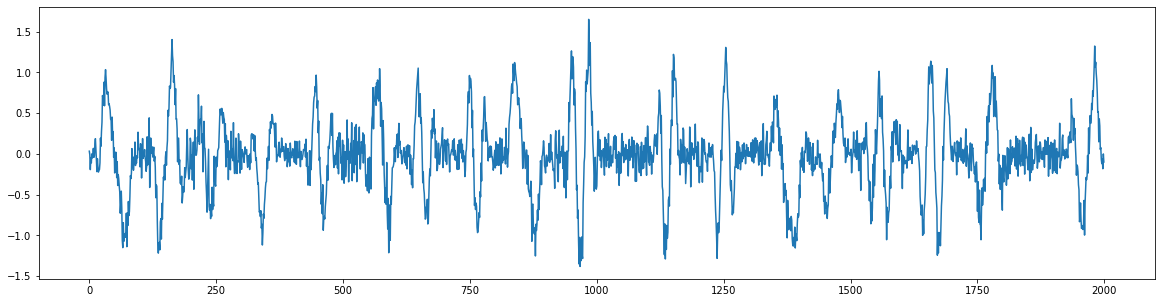

Actual targets
[4 2 2 2 6 5 6 6 1 6 0 6 6 4 2 3 6 5 0 2]
Predicted targets
[4 2 2 2 6 5 6 6 1 6 0 6 6 4 2 3 3 5 0 2]


In [80]:
#Verifying the model
#Actual waveform , actual targets and predicted targets
import random
print("Actual waveform")
plt.figure(figsize=(20,5))
r=random.randint(0,9)
plt.plot(final_test_input[r])
plt.show()
print("Actual targets")
print(final_test_target[r])
print("Predicted targets")
print(final_predicted_target[r])


Actual waveform


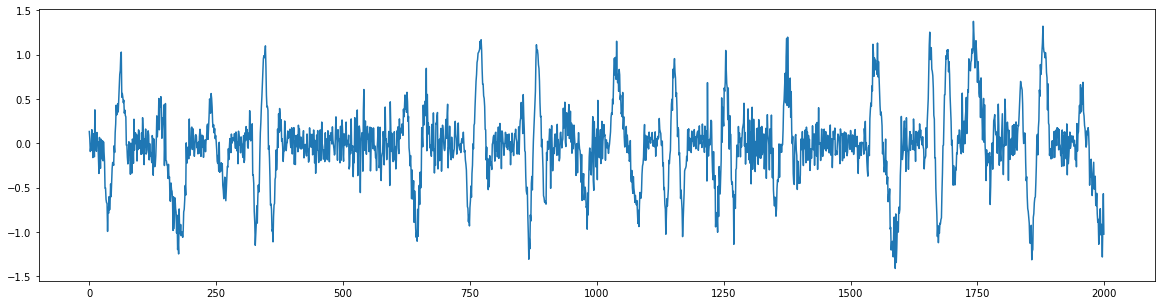

Actual targets
[2 4 1 3 0 0 5 5 3 1 1 3 3 2 0 4 6 1 5 1]
Predicted targets
[2 4 1 6 0 0 5 2 3 1 1 3 3 2 0 4 6 4 5 1]


In [81]:
print("Actual waveform")
plt.figure(figsize=(20,5))
plt.plot(final_test_input[10])
plt.show()
print("Actual targets")
print(final_test_target[10])
print("Predicted targets")
print(final_predicted_target[10])